# 301 Regression

View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11
* matplotlib

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible

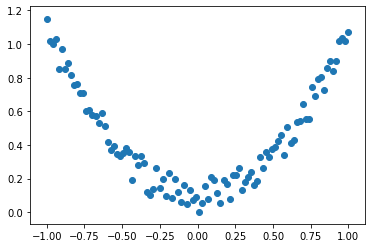

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
x

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [6]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [8]:
plt.ion()   # something about plotting

In [9]:
for t in range(1000):
    prediction = net(x)     # x was defined previously (-1 to 1)
    
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    print(loss)
    optimizer.step()        # apply gradients

#     if t % 100 == 0:
#         # plot and show learning process
#         plt.cla()
#         plt.scatter(x.data.numpy(), y.data.numpy())
#         plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
#         plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
#         plt.show()
#         plt.pause(0.1)

# plt.ioff()


tensor(0.6629, grad_fn=<MseLossBackward>)
tensor(0.4382, grad_fn=<MseLossBackward>)
tensor(0.3118, grad_fn=<MseLossBackward>)
tensor(0.1763, grad_fn=<MseLossBackward>)
tensor(0.1272, grad_fn=<MseLossBackward>)
tensor(0.1006, grad_fn=<MseLossBackward>)
tensor(0.0907, grad_fn=<MseLossBackward>)
tensor(0.0857, grad_fn=<MseLossBackward>)
tensor(0.0830, grad_fn=<MseLossBackward>)
tensor(0.0812, grad_fn=<MseLossBackward>)
tensor(0.0797, grad_fn=<MseLossBackward>)
tensor(0.0783, grad_fn=<MseLossBackward>)
tensor(0.0769, grad_fn=<MseLossBackward>)
tensor(0.0756, grad_fn=<MseLossBackward>)
tensor(0.0743, grad_fn=<MseLossBackward>)
tensor(0.0730, grad_fn=<MseLossBackward>)
tensor(0.0717, grad_fn=<MseLossBackward>)
tensor(0.0704, grad_fn=<MseLossBackward>)
tensor(0.0691, grad_fn=<MseLossBackward>)
tensor(0.0679, grad_fn=<MseLossBackward>)
tensor(0.0666, grad_fn=<MseLossBackward>)
tensor(0.0653, grad_fn=<MseLossBackward>)
tensor(0.0640, grad_fn=<MseLossBackward>)
tensor(0.0628, grad_fn=<MseLossBac

tensor(0.0071, grad_fn=<MseLossBackward>)
tensor(0.0071, grad_fn=<MseLossBackward>)
tensor(0.0071, grad_fn=<MseLossBackward>)
tensor(0.0071, grad_fn=<MseLossBackward>)
tensor(0.0071, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBac

tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0050, grad_fn=<MseLossBackward>)
tensor(0.0050, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0054, grad_fn=<MseLossBackward>)
tensor(0.0056, grad_fn=<MseLossBackward>)
tensor(0.0057, grad_fn=<MseLossBackward>)
tensor(0.0059, grad_fn=<MseLossBackward>)
tensor(0.0061, grad_fn=<MseLossBackward>)
tensor(0.0064, grad_fn=<MseLossBackward>)
tensor(0.0067, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0074, grad_fn=<MseLossBackward>)
tensor(0.0079, grad_fn=<MseLossBackward>)
tensor(0.0085, grad_fn=<MseLossBackward>)
tensor(0.0091, grad_fn=<MseLossBackward>)
tensor(0.0099, grad_fn=<MseLossBackward>)
tensor(0.0107, grad_fn=<MseLossBac

tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBac

tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
